In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [3]:
# Load the datasets
data_path = 'data.csv'
toxicity_path = 'Toxicity-13F.csv'

data_df = pd.read_csv(data_path)
toxicity_df = pd.read_csv(toxicity_path)

# Display the first few rows and the structure of each dataset
#data_df_info = data_df.info()
toxicity_df_info = toxicity_df.info()

#data_df_head = data_df.head()
toxicity_df_head = toxicity_df.head()

#data_df_info, data_df_head
toxicity_df_info, toxicity_df_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MDEC-23     171 non-null    float64
 1   MATS2v      171 non-null    float64
 2   ATSC8s      171 non-null    float64
 3   VE3_Dt      171 non-null    float64
 4   CrippenMR   171 non-null    float64
 5   SpMax7_Bhe  171 non-null    float64
 6   SpMin1_Bhs  171 non-null    float64
 7   C1SP2       171 non-null    int64  
 8   GATS8e      171 non-null    float64
 9   GATS8s      171 non-null    float64
 10  SpMax5_Bhv  171 non-null    float64
 11  VE3_Dzi     171 non-null    float64
 12  VPC-4       171 non-null    float64
 13  Class       171 non-null    object 
dtypes: float64(12), int64(1), object(1)
memory usage: 18.8+ KB


(None,
    MDEC-23  MATS2v   ATSC8s    VE3_Dt  CrippenMR  SpMax7_Bhe  SpMin1_Bhs  \
 0  60.1757 -0.0231  -0.6667 -167.1241     0.0000      3.4009      2.3109   
 1  44.5031 -0.1236 -16.5096  -16.2080   172.2000      3.3611      2.1117   
 2  37.5488  0.0662  19.3467 -159.1796   173.4028      3.2705      2.0198   
 3  40.5929  0.0714  -9.5672  -21.4416   177.2726      3.2748      2.0191   
 4  52.7343 -0.0861 -11.8892   -2.0780   171.1315      3.4094      2.1664   
 
    C1SP2  GATS8e  GATS8s  SpMax5_Bhv  VE3_Dzi   VPC-4     Class  
 0      4  1.0229  1.0575      3.5545 -15.5940  4.1692  NonToxic  
 1      2  1.7155  1.7013      3.6066 -14.3317  2.0821  NonToxic  
 2      8  0.6992  0.7828      3.6441 -25.4493  2.8730  NonToxic  
 3      6  0.9951  1.0298      3.6564 -19.6376  3.0444  NonToxic  
 4      2  0.7363  0.7427      3.5216  -8.2157  2.9469  NonToxic  )

In [5]:
# Check for missing values
toxicity_df_missing_values = toxicity_df.isnull().sum()

# Encode the 'Class' categorical variable
le = LabelEncoder()
toxicity_df['Class'] = le.fit_transform(toxicity_df['Class'])

# Apply standard scaling to the features (excluding the target variable 'Class')
scaler = StandardScaler()
feature_columns = toxicity_df.columns[:-1]  # all columns except 'Class'
toxicity_df[feature_columns] = scaler.fit_transform(toxicity_df[feature_columns])

# Summary after cleaning
toxicity_df_head_cleaned = toxicity_df.head()
toxicity_df_missing_values, toxicity_df_head_cleaned

(MDEC-23       0
 MATS2v        0
 ATSC8s        0
 VE3_Dt        0
 CrippenMR     0
 SpMax7_Bhe    0
 SpMin1_Bhs    0
 C1SP2         0
 GATS8e        0
 GATS8s        0
 SpMax5_Bhv    0
 VE3_Dzi       0
 VPC-4         0
 Class         0
 dtype: int64,
     MDEC-23    MATS2v    ATSC8s    VE3_Dt  CrippenMR  SpMax7_Bhe  SpMin1_Bhs  \
 0  2.092225 -0.217352  0.186968 -2.625719  -5.444685    0.943537    3.350632   
 1  0.533787 -1.450246 -0.341704  0.313640   0.966668    0.735030    0.869555   
 2 -0.157729  0.878145  0.854810 -2.470986   1.011450    0.260388   -0.275078   
 3  0.144968  0.941937 -0.110039  0.211706   1.155531    0.282915   -0.283797   
 4  1.352274 -0.990211 -0.187523  0.588847   0.926885    0.988068    1.550855   
 
       C1SP2    GATS8e    GATS8s  SpMax5_Bhv   VE3_Dzi     VPC-4  Class  
 0  0.801468 -0.147984 -0.149481    0.652473  0.197797  1.888770      0  
 1 -0.491466  1.378524  1.145486    0.915040  0.227784 -0.573989      0  
 2  3.387336 -0.861428 -0.702024    1

In [6]:
# Split the data into training and testing sets
X = toxicity_df.drop('Class', axis=1)  # features
y = toxicity_df['Class']  # target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the gradient boosting classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_classifier.fit(X_train, y_train)

# Predictions
y_pred = gb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Feature Importance
feature_importance = gb_classifier.feature_importances_

print("Accuracy:", accuracy)
print("Class Report:",class_report)
print("Feature Importance:",feature_importance)
'''
Gradient Boosting Classifier achieved an accuracy of 57.14% on the test set. 

Precision and Recall:  precision of 0.66 and a recall of 0.79 for the 'NonToxic' class (labeled as 0), and a precision of 0.17 and a recall of 0.09 for the 'Toxic' class (labeled as 1). 
This indicates a better performance on the 'NonToxic' class than the 'Toxic' class.
F1-Score: Reflects the balance between precision and recall. It was 0.72 for 'NonToxic' and 0.12 for 'Toxic', showing that the model struggles with the 'Toxic' class.
Feature Importance
The model identified features to be the most influential in predicting the outcomes (normalized importance values):
Feature at index 0 (MDEC-23): 22.06%
Feature at index 9 (GATS8s): 14.73%
Feature at index 11 (VE3_Dzi): 10.11%
'''

Accuracy: 0.5714285714285714
Class Report:               precision    recall  f1-score   support

           0       0.66      0.79      0.72        24
           1       0.17      0.09      0.12        11

    accuracy                           0.57        35
   macro avg       0.41      0.44      0.42        35
weighted avg       0.50      0.57      0.53        35

Feature Importance: [0.22057032 0.04541809 0.05885101 0.02117588 0.08660287 0.04091441
 0.03687196 0.05381975 0.06754831 0.14727858 0.05161165 0.10109258
 0.06824458]


"\nGradient Boosting Classifier achieved an accuracy of 57.14% on the test set. \n\nPrecision and Recall:  precision of 0.66 and a recall of 0.79 for the 'NonToxic' class (labeled as 0), and a precision of 0.17 and a recall of 0.09 for the 'Toxic' class (labeled as 1). \nThis indicates a better performance on the 'NonToxic' class than the 'Toxic' class.\nF1-Score: Reflects the balance between precision and recall. It was 0.72 for 'NonToxic' and 0.12 for 'Toxic', showing that the model struggles with the 'Toxic' class.\nFeature Importance\nThe model identified features to be the most influential in predicting the outcomes (normalized importance values):\nFeature at index 0 (MDEC-23): 22.06%\nFeature at index 9 (GATS8s): 14.73%\nFeature at index 11 (VE3_Dzi): 10.11%\n"

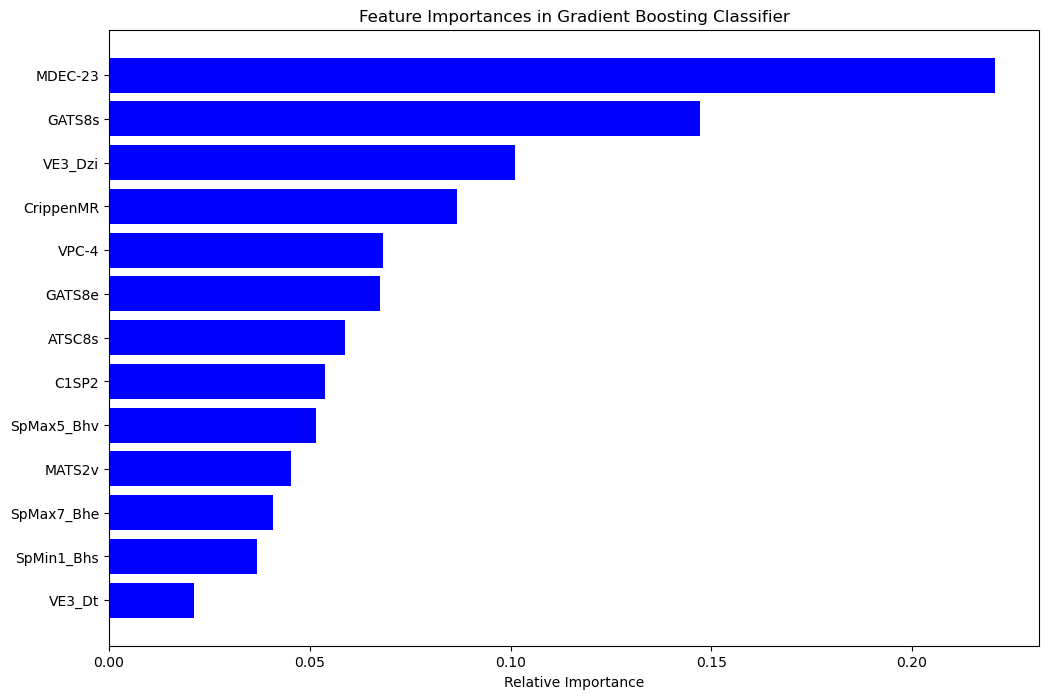

In [7]:
#Sorts these values in ascending order and returns their corresponding indices as an array
indices = np.argsort(feature_importance)[::-1]
feature_names = X.columns  

# Creating the plot again
plt.figure(figsize=(12, 8))
plt.title('Feature Importances in Gradient Boosting Classifier')
plt.barh(range(len(indices)), feature_importance[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important at the top
plt.show()

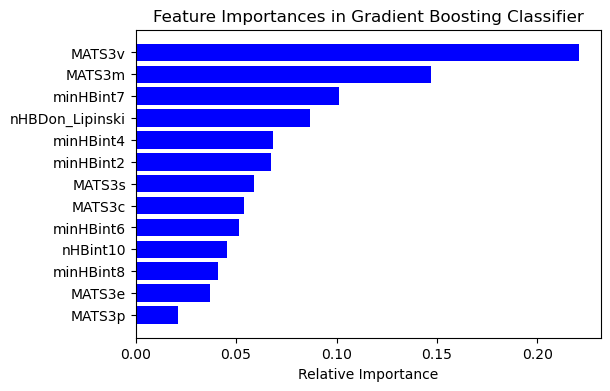

Number of features: 11, Accuracy: 0.5142857142857142, Precision: 0.2, F1-Score: 0.1904761904761905


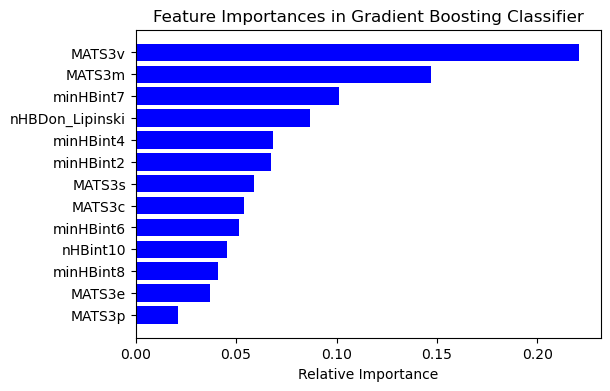

Number of features: 12, Accuracy: 0.5142857142857142, Precision: 0.2, F1-Score: 0.1904761904761905


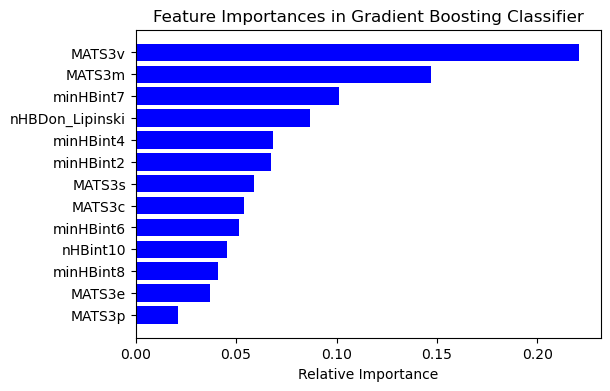

Number of features: 13, Accuracy: 0.6, Precision: 0.3333333333333333, F1-Score: 0.3


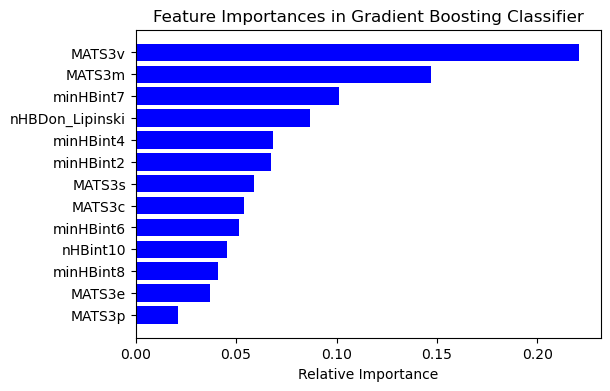

Number of features: 14, Accuracy: 0.6285714285714286, Precision: 0.4, F1-Score: 0.380952380952381


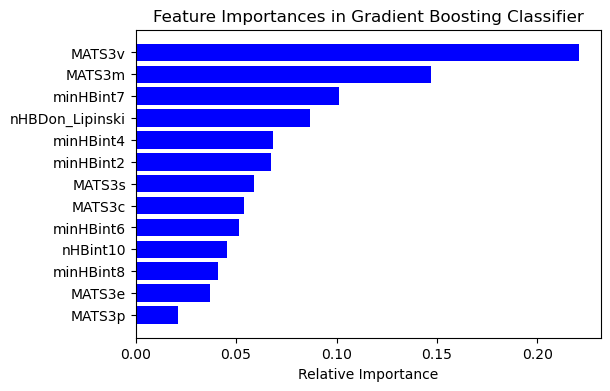

Number of features: 15, Accuracy: 0.6, Precision: 0.36363636363636365, F1-Score: 0.36363636363636365


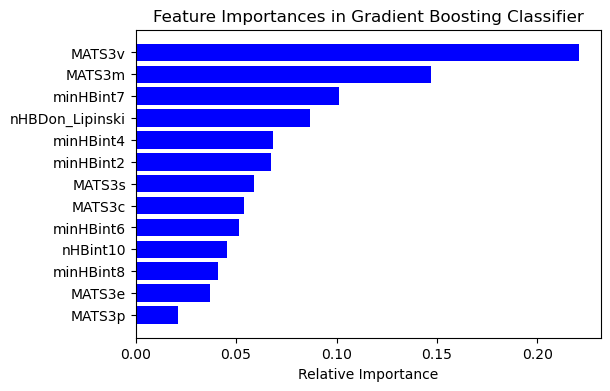

Number of features: 16, Accuracy: 0.6, Precision: 0.3333333333333333, F1-Score: 0.3


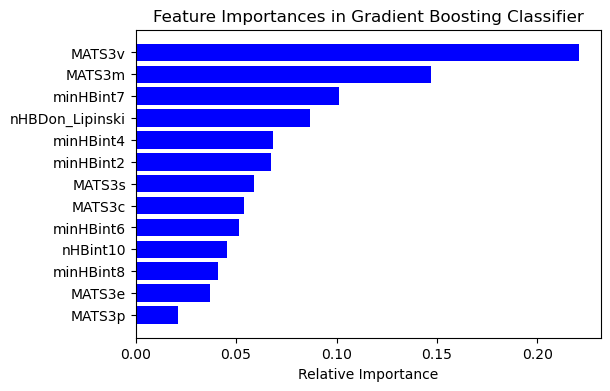

Number of features: 17, Accuracy: 0.5142857142857142, Precision: 0.25, F1-Score: 0.2608695652173913


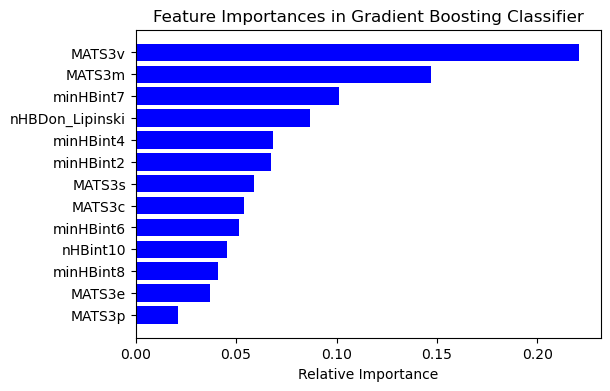

Number of features: 18, Accuracy: 0.5428571428571428, Precision: 0.2727272727272727, F1-Score: 0.2727272727272727


In [16]:
# Initialize lists
accuracies = []
precisions = []
f1_scores = []

# 'Class' categorical variable
le = LabelEncoder()
data_df['Class'] = le.fit_transform(data_df['Class'])

# Apply standard scaling to the features (excluding the target variable 'Class')
scaler = StandardScaler()
feature_columns = data_df.columns[:-1]  # all columns except 'Class'
data_df[feature_columns] = scaler.fit_transform(data_df[feature_columns])
X = data_df.drop('Class', axis=1)  # features
y = data_df['Class']  # target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Loop through 10 to 30 features
for n_features_to_select in range(11, 26):
    # Initialize the RFE model with GradientBoostingClassifier
    estimator = GradientBoostingClassifier()
    selector = RFE(estimator, n_features_to_select=n_features_to_select)

    # Fit RFE
    selector = selector.fit(X_train, y_train)

    # Transform the data to select only the selected features
    X_train_selected = selector.transform(X_train)
    X_test_selected = selector.transform(X_test)

    # Train Gradient Boosting Classifier
    clf = GradientBoostingClassifier()
    clf.fit(X_train_selected, y_train)

    # Predict on the test set
    y_pred = clf.predict(X_test_selected)

    # Calculate accuracy and precision
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store results
    accuracies.append(accuracy)
    precisions.append(precision)
    f1_scores.append(f1)

    indices = np.argsort(feature_importance)[::-1]
    feature_names = X.columns  

    # Creating the plot again
    plt.figure(figsize=(6, 4))
    plt.title('Feature Importances in Gradient Boosting Classifier')
    plt.barh(range(len(indices)), feature_importance[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.gca().invert_yaxis()  # Invert y-axis to have the most important at the top
    plt.show()

    print(f"Number of features: {n_features_to_select}, Accuracy: {accuracy}, Precision: {precision}, F1-Score: {f1}")



